In [4]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...,NaN,NaN,NaN
3661,ham,"What are you doing in langport? Sorry, but I'l...",NaN,NaN,NaN
4247,spam,"accordingly. I repeat, just text the word ok o...",NaN,NaN,NaN
1434,ham,I asked sen to come chennai and search for job.,NaN,NaN,NaN
2806,spam,December only! Had your mobile 11mths+? You ar...,NaN,NaN,NaN


In [8]:
df.shape


(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
1525,ham,Pls pls find out from aunt nike.
2532,ham,Yup ok...
174,ham,"Well, i'm gonna finish my bath now. Have a goo..."
4826,ham,Yup but it's not giving me problems now so may...
5264,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."


In [13]:
df.rename(columns ={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
2375,ham,Thanx 4 2day! U r a goodmate I THINK UR RITE S...
3036,ham,Cos darren say Ì_ considering mah so i ask Ì_...
2944,ham,"Hey babe, sorry i didn't get sooner. Gary can ..."
173,ham,"Bloody hell, cant believe you forgot my surnam..."
1001,spam,Please call our customer service representativ...


In [17]:
!pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --------------- ------------------------ 4.2/10.7 MB 20.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 23.6 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 20.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   --- ------------------------------------ 3.1/41.0 MB 15.4 MB/s eta 0:00:03
   ------ --------------------------------- 6.6/41.0 MB 16.1 MB/s eta 0:00:03
   --------- ------------------------------ 9.7/41.0 MB 15.5 MB/s eta 0:00:03
   ----------- ---------------------------- 11.5/41.0 MB 15.0 MB/s eta 0:00:02
   -------------- ------------------------- 14.7/41.0 MB 14.2 MB/s eta 0:00:02
   ----------------- ---------------------- 17.8/41.0 MB 14.4 MB/s eta 0:00:02
   -------------------- ------------------- 21.0/41.0 MB 14.3 MB/s eta 0:00:02
   ---------------------- ----------------- 23.1/41.0 MB 13.5 MB/s eta 0:00

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


In [20]:
df['target'] = encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [25]:
#check duplicate
df.duplicated().sum()

np.int64(403)

In [26]:
df=df.drop_duplicates(keep='first')

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.shape

(5169, 2)

In [29]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

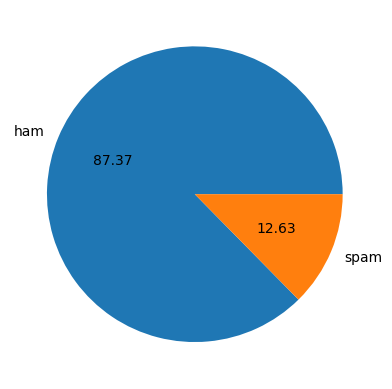

In [213]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [32]:
!pip install matplotlib

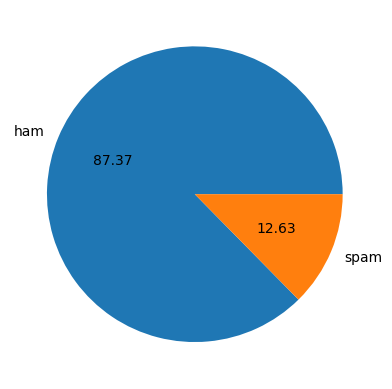

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
!pip install nltk

In [36]:
import nltk

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
df['num_characters'] =df['text'].apply(len)

In [41]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
#num of words
import nltk
nltk.download('punkt_tab')
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [47]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [50]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [52]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
df[df['target'] ==0 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
df[df['target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [55]:
!pip install seaborn

In [56]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

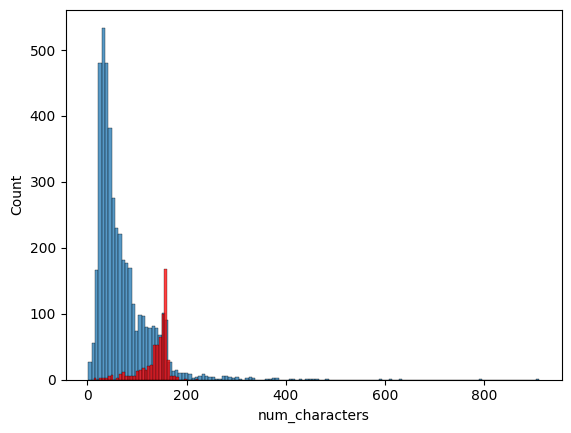

In [58]:
sns.histplot(df[df['target'] == 0 ]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

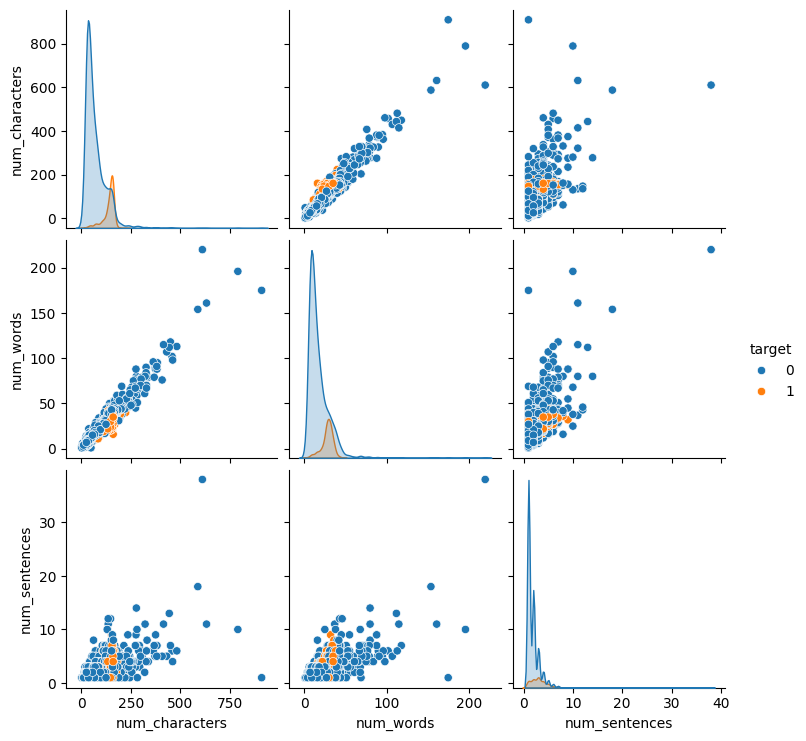

In [59]:
sns.pairplot(df,hue='target')

In [90]:
#data preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    # Lowercase
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Remove stopwords and punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

        

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [70]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [91]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [92]:
df['transform_text'] = df['text'].apply(transform_text)

In [93]:
df.head()

,target,text,num_characters,num_words,num_sentences,trandform_text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, ,, crazy, .., avail...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, ..., u, c, alrea...",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",nah think goe usf live around though


In [85]:
!pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [94]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))


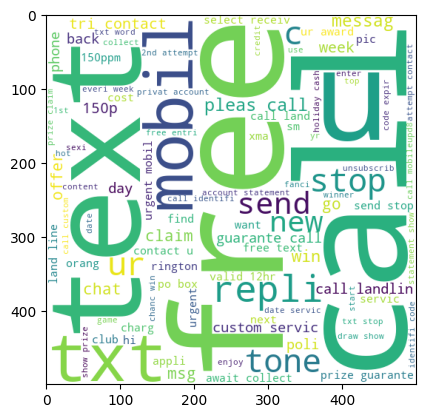

In [95]:
plt.imshow(spam_wc)

In [96]:
ham_wc =  wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

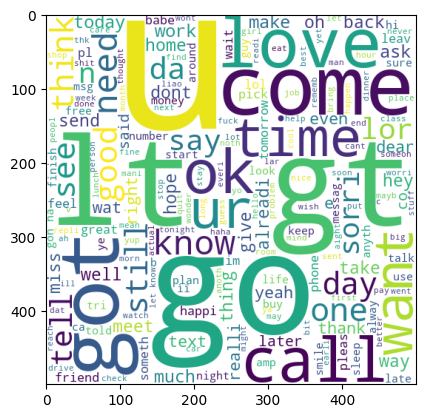

In [97]:
plt.imshow(ham_wc)

In [192]:
#model building

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [193]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [194]:
x= np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [195]:
x.shape

(5169, 3001)

In [196]:
y= df['target'].values

In [197]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [200]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [201]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [202]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8945841392649904
[[808  88]
 [ 21 117]]
0.5707317073170731


In [203]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9390715667311412
[[896   0]
 [ 63  75]]
1.0


In [204]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transform_text']).toarray()
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(probability=True, kernel='linear')
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)


voting_clf = VotingClassifier(estimators=[('svm', svm), ('nb', mnb), ('et', etc)],voting='soft')


voting_clf.fit(X_train, y_train)
model = voting_clf



In [209]:
y_pred = voting_clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("precision",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9835589941972921
precision 1.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       1.00      0.88      0.94       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [210]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [211]:
!pip install gradio

In [214]:
import gradio as gr
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pickle


nltk.download('punkt')
nltk.download('stopwords')


ps = PorterStemmer()


model = pickle.load(open('model.pkl', 'rb'))
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))

# Preprocessing function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = [i for i in text if i.isalnum()]
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]
    return " ".join([ps.stem(i) for i in y])


def predict_spam(msg):
    transformed = transform_text(msg)
    vector_input = tfidf.transform([transformed])
    result = model.predict(vector_input)[0]
    return "⚠️ SPAM ❗" if result == 1 else "✅ NOT SPAM"


gr.Interface(
    fn=predict_spam,
    inputs=gr.Textbox(lines=5, placeholder="Enter your message here..."),
    outputs="text",
    title="📩 Spam Message Detector",
    description="Enter a message to classify it as Spam or Not Spam."
).launch(share=True)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://b9f4b3bfa7e6a3c217.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "C:\Users\gayat\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gayat\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gayat\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gayat\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py", line 1702, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gayat\AppData\Local\P